In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D, Input
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
model_1 = keras.models.load_model('Optimization Results/Standard Trained Model/CNN_16_96_128_epochs_5_relu_RMSprop_categorical_crossentropy_padding_same')

# augmented model (pretrained)
#model_1 = keras.models.load_model('Optimization Results/augmentation on pretrained model/CNN_16_96_128_epochs_2_relu_RMSprop_categorical_crossentropy_padding_same_augmented_500_per_class+train_data')

#model_1 = keras.models.load_model('Optimization Results/augmentation on pretrained model/CNN_16_96_128_epochs_3_relu_RMSprop_categorical_crossentropy_padding_same_augmented_500_per_class')



# augmented model fresh trained

#model_1 = keras.models.load_model('Optimization Results/CNN_16_96_128_epochs_5_relu_RMSprop_categorical_crossentropy_padding_same_augmented_fresh_trained_500_class+train')

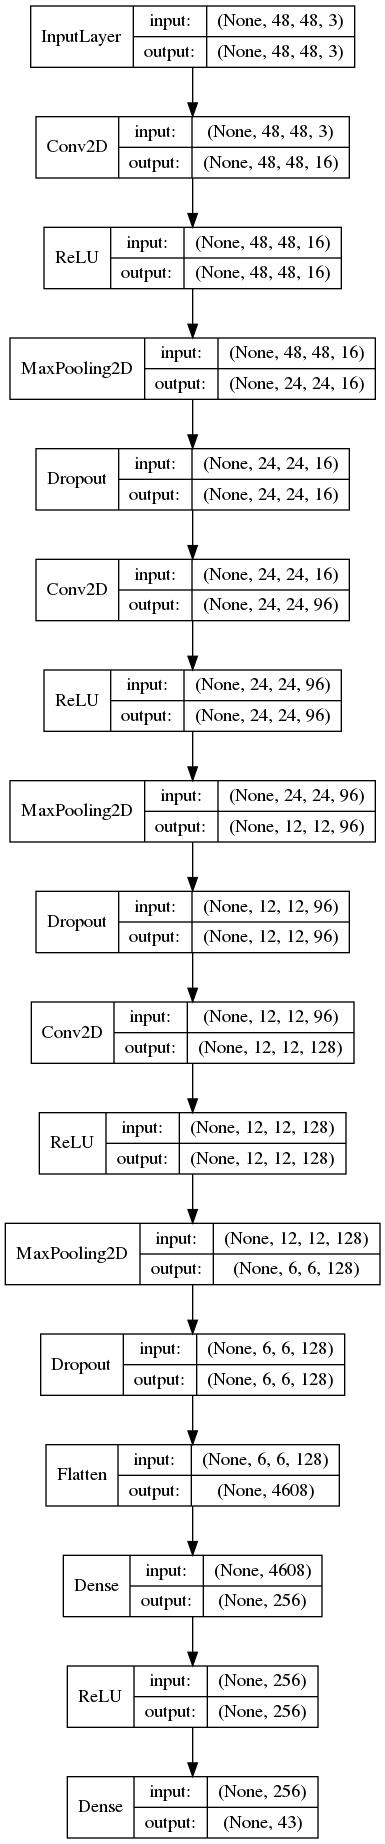

In [3]:
keras.utils.plot_model(model_1,to_file="model.png",show_shapes=True,show_layer_names=False,rankdir="TB",expand_nested=False,dpi=96)


In [3]:
import cv2

# convert image to ppm format

#rootpath = 'Own_test_images/class26.jpeg'
#newpath = 'Own_test_images/class26.ppm'
#im = Image.open(rootpath)
#im.save(newpath)

#can only use ppm format 
rootpath = 'Own_test_images/class26.ppm'
IMG_SIZE = 48
custom_data = cv2.resize(plt.imread(rootpath), (IMG_SIZE,IMG_SIZE))

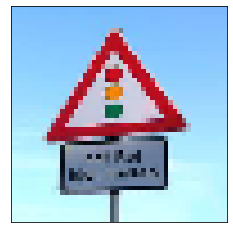

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))#, constrained_layout=True)



plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

axs.imshow(custom_data)
axs.set_xticks([])
axs.set_yticks([])
plt.savefig('Input_image_activations.png', dpi=500)
plt.show()

In [4]:
from keras.models import Model

layer_outputs = [layer.output for layer in model_1.layers]
activation_model = Model(inputs=model_1.input, outputs=layer_outputs)
activations = activation_model.predict(np.reshape(custom_data/255, (1,48,48,3)))
print(activations[11].shape)

(1, 6, 6, 128)


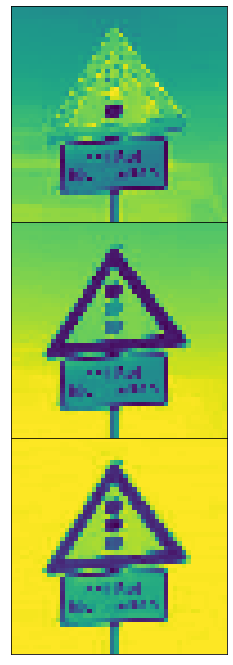

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(3, 9))#, constrained_layout=True)

axs = axs.ravel()

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
for i in range(0,axs.shape[0]):
    axs[i].imshow(activations[0][0,:,:,i], cmap='viridis')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.savefig('Activations_Input.png', dpi=500)
plt.show()
    

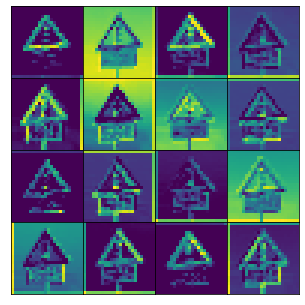

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(4, 4))#, constrained_layout=True)

axs = axs.ravel()

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
for i in range(0,axs.shape[0]):
    axs[i].imshow(activations[3][0,:,:,i], cmap='viridis')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.savefig('Activations_Layer_1.png')
plt.show()

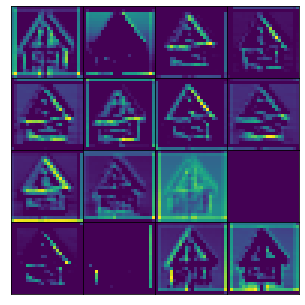

In [8]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(4, 4))#, constrained_layout=True)

axs = axs.ravel()

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

for i in range(0,axs.shape[0]):
    axs[i].imshow(activations[6][0,:,:,i], cmap='viridis')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.savefig('Activations_Layer_2.png')
plt.show()

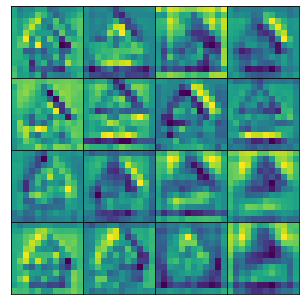

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(4, 4))#, constrained_layout=True)

axs = axs.ravel()

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

for i in range(0,axs.shape[0]):
    axs[i].imshow(activations[9][0,:,:,i], cmap='viridis')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.savefig('Activations_Layer_3.png')
plt.show()

In [3]:
X_test = np.load("test_data.npy")
y_test = np.load('test_labels.npy')

In [4]:
class_features = []
class_labels = []
for i in range(0,43):
    class_features.append([])
    class_labels.append([])

for i, label in enumerate(y_test):
    class_labels[int(np.argmax(label))].append(label)
    class_features[int(np.argmax(label))].append(X_test[i])
    

In [5]:
results = []
for i, c in enumerate(class_features):
    c = np.reshape(c, (-1, c[0].shape[0], c[0].shape[0], 3))
    score = model_1.evaluate(c, np.array(class_labels[i]), verbose = 0)
    #print('Class: ', i)
    #print('Test loss:', score[0]) 
    #print('Test accuracy:', score[1])
    results.append(score[1])

Text(0.5, 1.0, 'Test accuracy per class')

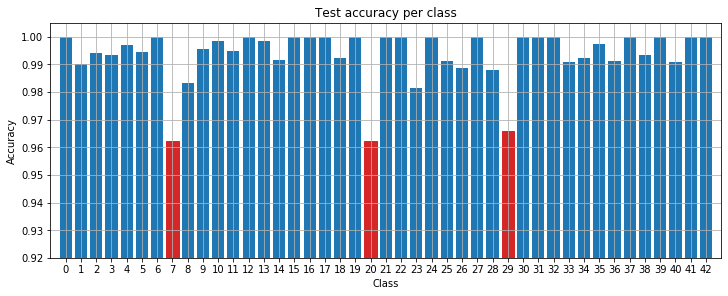

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,43),results, width)
for i, bar in enumerate(barlist):
    if results[i] < 0.98:
        bar.set_color('tab:red')

axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1)
axs.set_ylim(ymax=1.005,ymin=0.92)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Class')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy per class')
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
#plt.savefig('Class_accuracy_(noaugmention).png', dpi=500)

In [29]:
score = model_1.evaluate(X_test, y_test, verbose = 0) 
print(X_test.shape)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

(11923, 48, 48, 3)
Test loss: 0.01677840158032044
Test accuracy: 0.9960580468177795


In [9]:
model_1 = keras.models.load_model('Optimization Results/augmentation on pretrained model/CNN_16_96_128_relu_RMSprop_categorical_crossentropy_padding_same_augmented_low+1000')

results_ = []
for i, c in enumerate(class_features):
    c = np.reshape(c, (-1, c[0].shape[0], c[0].shape[0], 3))
    score = model_1.evaluate(c, np.array(class_labels[i]), verbose = 0)
    #print('Class: ', i)
    #print('Test loss:', score[0]) 
    #print('Test accuracy:', score[1])
    results_.append(score[1])

In [10]:
score = model_1.evaluate(X_test, y_test, verbose = 0) 
print(X_test.shape)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

(11923, 48, 48, 3)
Test loss: 0.032556737595430325
Test accuracy: 0.9941290020942688


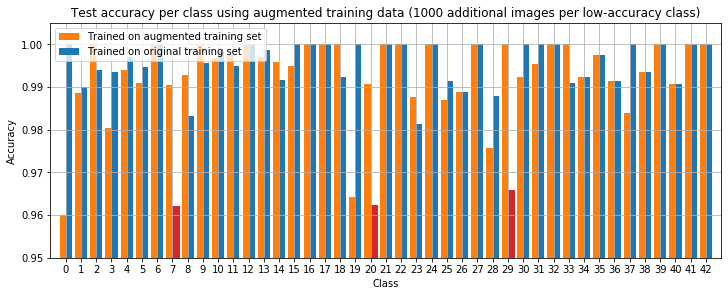

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.4  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,43)-0.2,results_, width, color='tab:orange', label='Trained on augmented training set')
barlist2= axs.bar(np.arange(0,43)+0.2,results, width, color='tab:blue', label='Trained on original training set')



for i, bar in enumerate(barlist2):
    if results[i] < 0.98:
        bar.set_color('tab:red')


axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1)
axs.set_ylim(ymax=1.005,ymin=0.95)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Class')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy per class using augmented training data (1000 additional images per low-accuracy class)')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig('Class_accuracy_aug_vs_orig_low.png', dpi=500)
#plt.savefig('Class_accuracy_aug_vs_orig.png', dpi=500)

In [6]:
# predict class of certain example
import cv2
from PIL import Image

# convert image to ppm format

rootpath = 'Own_test_images/class26_new.jpg'
newpath = 'Own_test_images/class26_new.ppm'
im = Image.open(rootpath)
im.save(newpath)

#can only use ppm format 
rootpath = 'Own_test_images/class26_new.ppm'
IMG_SIZE = 48
custom_data = cv2.resize(plt.imread(rootpath), (IMG_SIZE,IMG_SIZE))/255

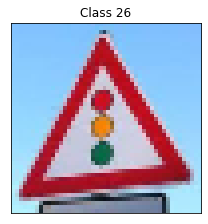

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(3, 3), constrained_layout=True)



#plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

axs.imshow(custom_data)
axs.set_xticks([])
axs.set_yticks([])
axs.set_title('Class 26')
plt.savefig('Limit_img.png', dpi=500)
plt.show()

In [8]:
classes = np.reshape(model_1.predict(np.reshape(custom_data,(1,48,48,3))), (43,))#(y.shape[1],))
print('Predicted class:', np.argmax(classes))


Predicted class: 26


In [6]:
# load image of that class
X_test = np.load("test_data.npy")
y_test = np.load('test_labels.npy')

In [7]:
class_features = []
class_labels = []
for i in range(0,43):
    class_features.append([])
    class_labels.append([])

for i, label in enumerate(y_test):
    class_labels[int(np.argmax(label))].append(label)
    class_features[int(np.argmax(label))].append(X_test[i])

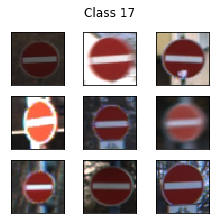

In [44]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(3, 3), constrained_layout=True)


axs = axs.ravel()

#plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
for i in range(0,9):

    axs[i].imshow(class_features[17][i+23])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
fig.suptitle('Class 17')
plt.savefig('Pred_class_lim_img_2.png', dpi=500)
plt.show()

In [ ]:
#data = np.load('class1_test_features_32.npy')/255
#data = np.load('test_data.npy')/255
data = np.load('custom_data.npy')/255
data = np.reshape(data, (1,48,48,3))

#data = np.reshape(data, (data.shape[0],32,32,3))
sum_ = 0
idx = 0
for img in data:
    
    classes = np.reshape(model_1.predict(np.reshape(img,(1,48,48,3))), (43,))#(y.shape[1],))
    print('Predicted class:', np.argmax(classes))
    print('Imagenumber:', idx)
    idx += 1
    if np.argmax(classes) == 0:
        sum_ += 1
accuracy = sum_/data.shape[0]
print(accuracy)